In [1]:
#Libraries

import pandas as pd
pd.options.mode.chained_assignment = None
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing NBA Stats 2021/2022 CSV

df = pd.read_csv('data/NBA_Stats_202122.csv', sep=';', encoding='unicode_escape')
df

,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,FTA,...,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a playerÕs ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
0,Precious Achiuwa,Tor,F,"22,56",73,"23,6","49,2","18,5","11,3",131,...,"6,5","14,9","1,1","6,9","0,51","0,56","1,15","6,8","105,4",104
1,Steven Adams,Mem,C,"28,73",76,"26,3","54,8",12,"19,6",199,...,10,"19,9","3,4","16,1","0,87","0,79","1,51","9,4","124,7","103,9"
2,Bam Adebayo,Mia,C-F,"24,73",56,"32,6","67,9",25,"14,4",340,...,"10,1","17,5","3,4","17,5","1,43","0,79","2,64","10,7","117,2","98,2"
3,Santi Aldama,Mem,F-C,"21,25",32,"11,2","23,4","18,5","9,9",32,...,"2,7","12,6","0,7","7,7","0,19","0,31","0,5","7,1","101,1","103,9"
4,LaMarcus Aldridge,Bro,C-F,"36,73",47,"22,3","46,5","22,4",8,102,...,"5,5","13,4","0,9","6,3","0,3",1,"0,94","7,2","119,6","108,8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,Thaddeus Young,Tor,F,"33,8",26,"18,3","38,1",16,"12,4",27,...,"4,4",13,"1,7","13,6","1,19","0,42","0,85","7,9","112,8",102
712,Trae Young,Atl,G,"23,56",76,"34,9","72,7","34,4","14,5",553,...,"3,7","5,9","9,7","46,8","0,96","0,09","3,99","11,5","119,5","114,3"
713,Omer Yurtseven,Mia,C,"23,81",56,"12,6","26,3","19,8",13,61,...,"5,3","23,6","0,9",11,"0,3","0,36","0,73","9,3","113,3","94,7"
714,Cody Zeller,Por,F-C,"29,51",27,"13,1","27,4",16,"14,6",49,...,"4,6","19,3","0,8","9,4","0,3","0,22","0,7","8,2","128,3","101,8"


In [3]:
# Creating a new subset and renaming columns

df_2 = df[['FULL NAME','TEAM','POS','AGE','TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.',
       'PPGPointsPoints per game.', 'RPGReboundsRebounds per game.','APGAssistsAssists per game.','SPGStealsSteals per game.', 'BPGBlocksBlocks per game.',
       'TOPGTurnoversTurnovers per game.']]
df_2.rename(columns={'TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.': 'TS%',
                        'PPGPointsPoints per game.': 'PPG',
                        'RPGReboundsRebounds per game.': 'RPG',
                        'APGAssistsAssists per game.': 'APG',
                        'SPGStealsSteals per game.': 'SPG',
                        'BPGBlocksBlocks per game.': 'BPG',
                        'TOPGTurnoversTurnovers per game.': 'TOPG'},
          inplace=True)
df_2.columns

Index(['FULL NAME', 'TEAM', 'POS', 'AGE', 'TS%', 'PPG', 'RPG', 'APG', 'SPG',
       'BPG', 'TOPG'],
      dtype='object')

In [4]:
#Converting numeric columns to floats

list_columns = ['AGE', 'TS%', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'TOPG']
for i in list_columns:
    df_2[i] = df_2[i].str.replace(',','.').astype(float)

In [5]:
df_2.dtypes

FULL NAME     object
TEAM          object
POS           object
AGE          float64
TS%          float64
PPG          float64
RPG          float64
APG          float64
SPG          float64
BPG          float64
TOPG         float64
dtype: object

In [6]:
# Calculating player efficiency with the formula created by Kansas City sports reporter and statistician Martin Manley

df_2['MPPG'] = (df_2['PPG'] * (1- df_2['TS%']))
df_2['EFF'] = df_2['PPG'] + df_2['RPG'] + df_2['APG'] + df_2['SPG'] + df_2['BPG'] - df_2['TOPG'] - df_2['MPPG']

In [7]:
# Dropping unnecessary columns for analysis

df_2.drop(columns=['TS%','PPG','RPG','APG','SPG','BPG','TOPG','MPPG'], inplace=True)

In [8]:
# Cleaning the remaining columns

df_2['TEAM'] = df_2['TEAM'].replace('Tor','Toronto Raptors').replace('Mem','Memphis Grizzlies').replace('Mia','Miami Heat').replace('Bro','Brooklyn Nets').replace('Nor','New Orleans Pelicans').replace('Uta','Utah Jazz').replace('Mil','Milwaukee Bucks').replace('Cle','Cleveland Cavaliers').replace('Ind','Indiana Pacers').replace('Lal','Los Angeles Lakers').replace('Orl','Orlando Magic').replace('Nyk','New York Knicks').replace('Nor','New Orleans Pelicans').replace('Hou','Houston Rockets').replace('Was','Washington Wizards').replace('Pho','Phoenix Suns').replace('Sac','Sacramento Kings').replace('Det','Detroit Pistons').replace('Cha','Charlotte Hornets').replace('Chi','Chicago Bulls').replace('Atl','Atlanta Hawks').replace('Den','Denver Nuggets').replace('Phi','Philadelphia 76ers').replace('San','San Antonio Spurs').replace('Lac','Los Angeles Clippers').replace('Okc','Oklahoma City Thunder').replace('Min','Minnesota Timberwolves').replace('Dal','Dallas Mavericks').replace('Gol','Golden State Warriors').replace('Por','Portland Trail Blazers').replace('Bos','Boston Celtics')
df_2['POS'] = df_2['POS'].replace('G','Point Guard (1)').replace('F','Small Forward (3)').replace('C','Center (5)').replace('C-F','Power Forward (4)').replace('F-C','Power Forward (4)').replace('F-G','Shooting Guard (2)').replace('G-F','Shooting Guard (2)')
df_2['AGE'] = df_2['AGE'].astype(int)
df_2

,FULL NAME,TEAM,POS,AGE,EFF
0,Precious Achiuwa,Toronto Raptors,Small Forward (3),22,12.0973
1,Steven Adams,Memphis Grizzlies,Center (5),28,17.4140
2,Bam Adebayo,Miami Heat,Power Forward (4),24,24.6928
3,Santi Aldama,Memphis Grizzlies,Power Forward (4),21,5.2532
4,LaMarcus Aldridge,Brooklyn Nets,Power Forward (4),36,14.5516
...,...,...,...,...,...
711,Thaddeus Young,Toronto Raptors,Small Forward (3),33,10.1738
712,Trae Young,Atlanta Hawks,Point Guard (1),23,27.5852
713,Omer Yurtseven,Miami Heat,Center (5),23,9.0238
714,Cody Zeller,Portland Trail Blazers,Power Forward (4),29,8.4804


## SALARIES

In [9]:
res = requests.get('https://hoopshype.com/salaries/players/2021-2022/')
html = res.content
soup = BeautifulSoup(html, "html.parser")

In [10]:
players = soup.find_all("td", attrs={"class": "name"})
players[1]

<td class="name">
<a href="https://hoopshype.com/player/stephen-curry/salary/">
								Stephen Curry							</a>
</td>

In [11]:
names = players[1].getText().strip()
names

'Stephen Curry'

In [12]:
names_list = [i.getText().strip() for i in players]
names_list.pop(0) #Deleting the first item of the list ('Player')
len(names_list)

653

In [13]:
salary = soup.find_all("td", attrs={"style": "color:black"})
salary[0]

<td class="" data-value="45780966" style="color:black">
							$45,780,966						</td>

In [14]:
total = salary[0].getText().strip().replace('$','').replace(',','')
total

'45780966'

In [15]:
salaries = [i.getText().strip().replace('$','').replace(',','') for i in salary]
len(salaries)

1306

In [16]:
salaries_list = []
count = 0
for i in salaries:
    count += 1 
    if count % 2 == 0:
        salaries_list.append(int(i))

In [17]:
all_together = {
    "full_name_1" : names_list,
    "SALARY" : salaries_list
}

In [18]:
salaries_df = pd.DataFrame(all_together)
salaries_df

,full_name_1,SALARY
0,Stephen Curry,49928610
1,John Wall,48325294
2,James Harden,48325294
3,Russell Westbrook,48216568
4,Kevin Durant,45825710
...,...,...
648,Jaime Echenique,57993
649,Luca Vildoza,46665
650,Zavier Simpson,40595
651,Mfiondu Kabengele,20924


## INSTAGRAM FOLLOWERS

In [19]:
res = requests.get('https://www.popularbasketballers.com/')
html = res.content
soup = BeautifulSoup(html, "html.parser")

In [20]:
players_f = soup.find_all("tr")
players_f.pop(0)
len(players_f)

467

In [21]:
players_f[0]

<tr>
<td align="right">1</td>
<td>LeBron James</td>
<td>133,332,035</td>
</tr>

In [22]:
name_fol = [i.getText().strip().replace(',','').split('\n') for i in players_f]
name_fol[0]

['1', 'LeBron James', '133332035']

In [23]:
full_name_list = [i[1] for i in name_fol]
followers_list = [int(i[2]) for i in name_fol]
print(full_name_list[:5])
print(followers_list[:5])

['LeBron James', 'Stephen Curry', 'Russell Westbrook', 'Kyrie Irving', 'Lonzo Ball']
[133332035, 46394997, 20663214, 17343900, 14938820]


In [24]:
all_together_2 = {
    "full_name_2" : full_name_list,
    "FOLLOWERS" : followers_list
}

In [25]:
followers_df = pd.DataFrame(all_together_2)
followers_df

,full_name_2,FOLLOWERS
0,LeBron James,133332035
1,Stephen Curry,46394997
2,Russell Westbrook,20663214
3,Kyrie Irving,17343900
4,Lonzo Ball,14938820
...,...,...
462,Julian Champagnie,10970
463,Eugene Omoruyi,10000
464,Terry Taylor,7944
465,Javon Freeman-Liberty,7100


## MERGE

In [26]:
df_merge = pd.merge(df_2, salaries_df, left_on='FULL NAME', right_on='full_name_1', how='left')
df_merge

,FULL NAME,TEAM,POS,AGE,EFF,full_name_1,SALARY
0,Precious Achiuwa,Toronto Raptors,Small Forward (3),22,12.0973,Precious Achiuwa,2956915.0
1,Steven Adams,Memphis Grizzlies,Center (5),28,17.4140,Steven Adams,18619958.0
2,Bam Adebayo,Miami Heat,Power Forward (4),24,24.6928,Bam Adebayo,30649609.0
3,Santi Aldama,Memphis Grizzlies,Power Forward (4),21,5.2532,NaN,NaN
4,LaMarcus Aldridge,Brooklyn Nets,Power Forward (4),36,14.5516,LaMarcus Aldridge,2881021.0
...,...,...,...,...,...,...,...
711,Thaddeus Young,Toronto Raptors,Small Forward (3),33,10.1738,Thaddeus Young,15475579.0
712,Trae Young,Atlanta Hawks,Point Guard (1),23,27.5852,Trae Young,9080829.0
713,Omer Yurtseven,Miami Heat,Center (5),23,9.0238,Omer Yurtseven,1623970.0
714,Cody Zeller,Portland Trail Blazers,Power Forward (4),29,8.4804,Cody Zeller,2606136.0


In [27]:
final_df = pd.merge(df_merge, followers_df, left_on='FULL NAME', right_on='full_name_2', how='left')
final_df

,FULL NAME,TEAM,POS,AGE,EFF,full_name_1,SALARY,full_name_2,FOLLOWERS
0,Precious Achiuwa,Toronto Raptors,Small Forward (3),22,12.0973,Precious Achiuwa,2956915.0,Precious Achiuwa,178612.0
1,Steven Adams,Memphis Grizzlies,Center (5),28,17.4140,Steven Adams,18619958.0,Steven Adams,518545.0
2,Bam Adebayo,Miami Heat,Power Forward (4),24,24.6928,Bam Adebayo,30649609.0,Bam Adebayo,844028.0
3,Santi Aldama,Memphis Grizzlies,Power Forward (4),21,5.2532,NaN,NaN,Santi Aldama,16453.0
4,LaMarcus Aldridge,Brooklyn Nets,Power Forward (4),36,14.5516,LaMarcus Aldridge,2881021.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
711,Thaddeus Young,Toronto Raptors,Small Forward (3),33,10.1738,Thaddeus Young,15475579.0,NaN,NaN
712,Trae Young,Atlanta Hawks,Point Guard (1),23,27.5852,Trae Young,9080829.0,Trae Young,4791317.0
713,Omer Yurtseven,Miami Heat,Center (5),23,9.0238,Omer Yurtseven,1623970.0,Omer Yurtseven,78776.0
714,Cody Zeller,Portland Trail Blazers,Power Forward (4),29,8.4804,Cody Zeller,2606136.0,Cody Zeller,41028.0


In [28]:
final_df.drop(columns=['full_name_1','full_name_2'], inplace=True)

In [29]:
final_df

,FULL NAME,TEAM,POS,AGE,EFF,SALARY,FOLLOWERS
0,Precious Achiuwa,Toronto Raptors,Small Forward (3),22,12.0973,2956915.0,178612.0
1,Steven Adams,Memphis Grizzlies,Center (5),28,17.4140,18619958.0,518545.0
2,Bam Adebayo,Miami Heat,Power Forward (4),24,24.6928,30649609.0,844028.0
3,Santi Aldama,Memphis Grizzlies,Power Forward (4),21,5.2532,NaN,16453.0
4,LaMarcus Aldridge,Brooklyn Nets,Power Forward (4),36,14.5516,2881021.0,NaN
...,...,...,...,...,...,...,...
711,Thaddeus Young,Toronto Raptors,Small Forward (3),33,10.1738,15475579.0,NaN
712,Trae Young,Atlanta Hawks,Point Guard (1),23,27.5852,9080829.0,4791317.0
713,Omer Yurtseven,Miami Heat,Center (5),23,9.0238,1623970.0,78776.0
714,Cody Zeller,Portland Trail Blazers,Power Forward (4),29,8.4804,2606136.0,41028.0


In [30]:
final_df.dropna(axis = 0, how = 'any', inplace=True)
final_df.reset_index(drop=True, inplace=True)
final_df['SALARY'] = final_df['SALARY'].astype(int)
final_df['FOLLOWERS'] = final_df['FOLLOWERS'].astype(int)
final_df['EFF'] = final_df['EFF'].round(0).astype(int)
final_df

,FULL NAME,TEAM,POS,AGE,EFF,SALARY,FOLLOWERS
0,Precious Achiuwa,Toronto Raptors,Small Forward (3),22,12,2956915,178612
1,Steven Adams,Memphis Grizzlies,Center (5),28,17,18619958,518545
2,Bam Adebayo,Miami Heat,Power Forward (4),24,25,30649609,844028
3,Nickeil Alexander-Walker,New Orleans Pelicans,Point Guard (1),23,12,3556962,130983
4,Nickeil Alexander-Walker,Utah Jazz,Point Guard (1),23,4,3556962,130983
...,...,...,...,...,...,...,...
391,Delon Wright,Atlanta Hawks,Point Guard (1),29,9,9298779,123608
392,Trae Young,Atlanta Hawks,Point Guard (1),23,28,9080829,4791317
393,Omer Yurtseven,Miami Heat,Center (5),23,9,1623970,78776
394,Cody Zeller,Portland Trail Blazers,Power Forward (4),29,8,2606136,41028


In [31]:
final_df.dtypes

FULL NAME    object
TEAM         object
POS          object
AGE           int64
EFF           int64
SALARY        int64
FOLLOWERS     int64
dtype: object

<AxesSubplot:xlabel='SALARY', ylabel='EFF'>

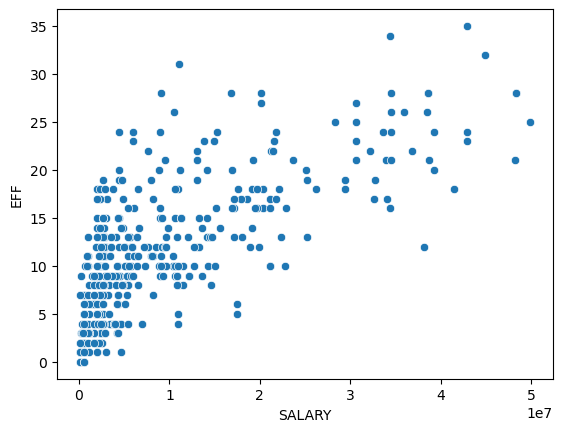

In [32]:
sns.scatterplot(x="SALARY", y="EFF", data=final_df)

(0.0, 1000000.0)

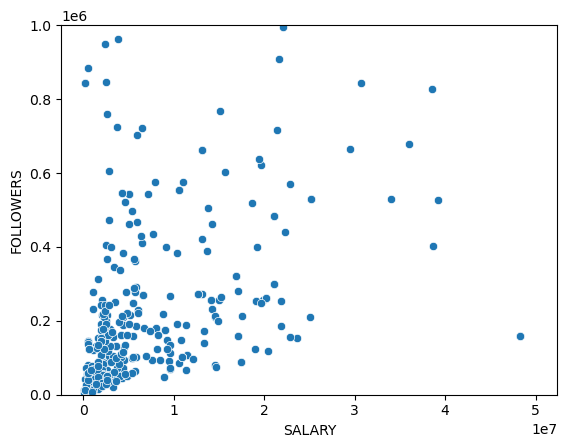

In [33]:
sns.scatterplot(x="SALARY", y="FOLLOWERS", data=final_df)
plt.ylim(0, 1000000)

(0.0, 1000000.0)

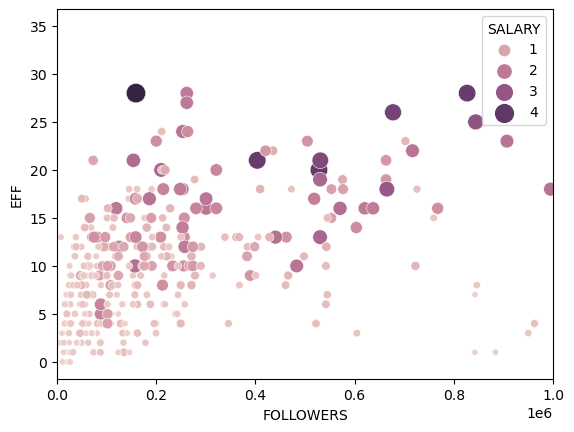

In [61]:
sns.scatterplot(x="FOLLOWERS", y="EFF", data=final_df, size="SALARY", hue='SALARY', sizes=(20, 200))
plt.xlim(0, 1000000) #Maximum 1,000,000 followers to avoid showing outliers

(0.0, 1000000.0)

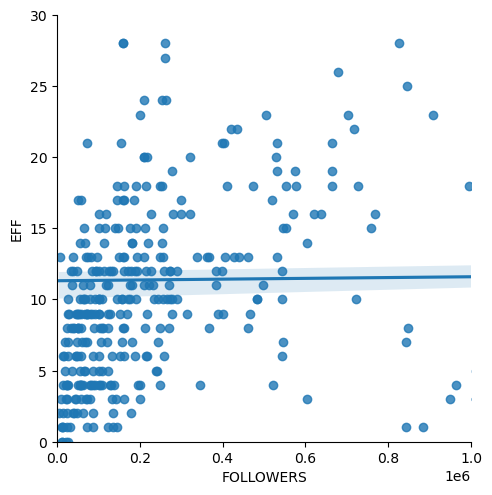

In [72]:
sns.lmplot(x="FOLLOWERS", y="EFF", data=final_df)
plt.ylim(0, 30)
plt.xlim(0, 1000000) #Maximum 1,000,000 followers to avoid showing outliers

(0.0, 30.0)

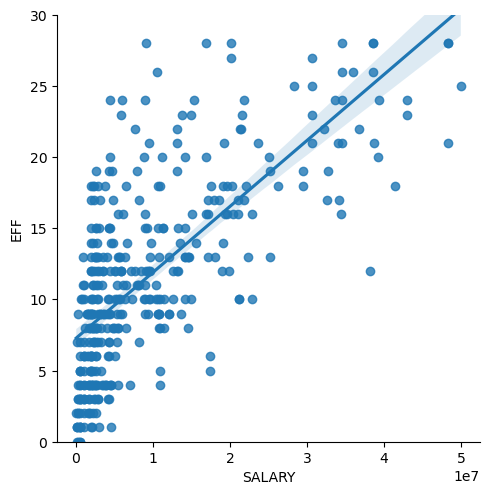

In [73]:
sns.lmplot(x="SALARY", y="EFF", data=final_df)
plt.ylim(0, 30)

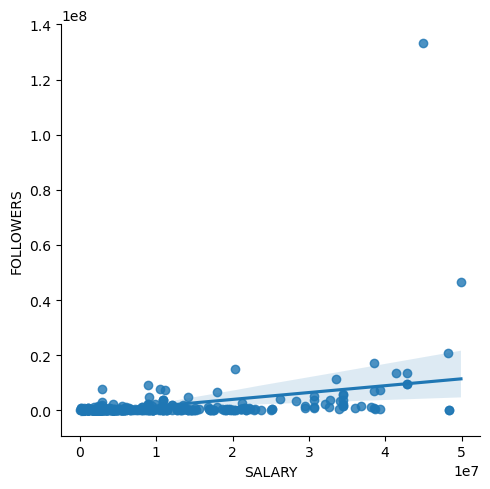

In [78]:
sns.lmplot(x="SALARY", y="FOLLOWERS", data=final_df)
plt.ylim(0, 10000000)


<AxesSubplot:xlabel='SALARY', ylabel='AGE'>

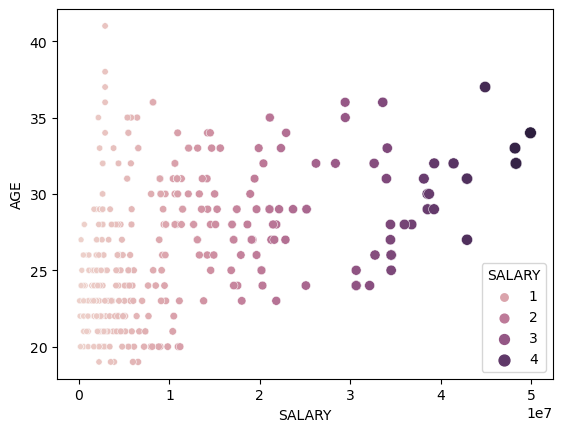

In [54]:
sns.scatterplot(x="SALARY", y="AGE", hue='SALARY', size="SALARY", data=final_df)

<AxesSubplot:xlabel='AGE', ylabel='TEAM'>

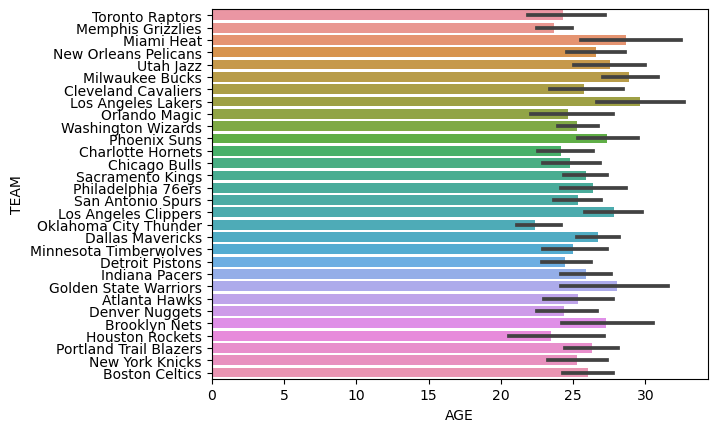

In [51]:
sns.barplot(y="TEAM", x="AGE", data=final_df)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Point Guard (1)'),
  Text(1, 0, 'Shooting Guard (2)'),
  Text(2, 0, 'Small Forward (3)'),
  Text(3, 0, 'Power Forward (4)'),
  Text(4, 0, 'Center (5)')])

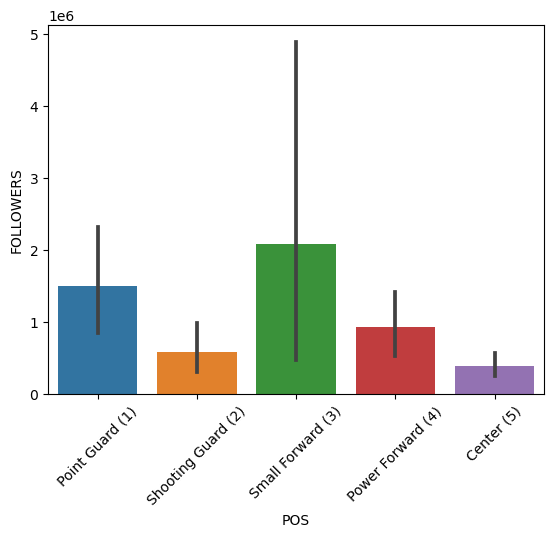

In [45]:
sns.barplot(x="POS", y="FOLLOWERS", data=final_df, order=['Point Guard (1)','Shooting Guard (2)','Small Forward (3)','Power Forward (4)','Center (5)'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Point Guard (1)'),
  Text(1, 0, 'Shooting Guard (2)'),
  Text(2, 0, 'Small Forward (3)'),
  Text(3, 0, 'Power Forward (4)'),
  Text(4, 0, 'Center (5)')])

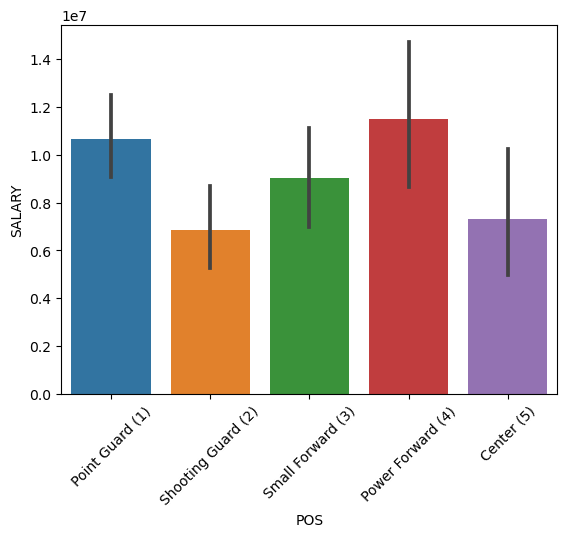

In [46]:
sns.barplot(x="POS", y="SALARY", data=final_df, order=['Point Guard (1)','Shooting Guard (2)','Small Forward (3)','Power Forward (4)','Center (5)'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Point Guard (1)'),
  Text(1, 0, 'Shooting Guard (2)'),
  Text(2, 0, 'Small Forward (3)'),
  Text(3, 0, 'Power Forward (4)'),
  Text(4, 0, 'Center (5)')])

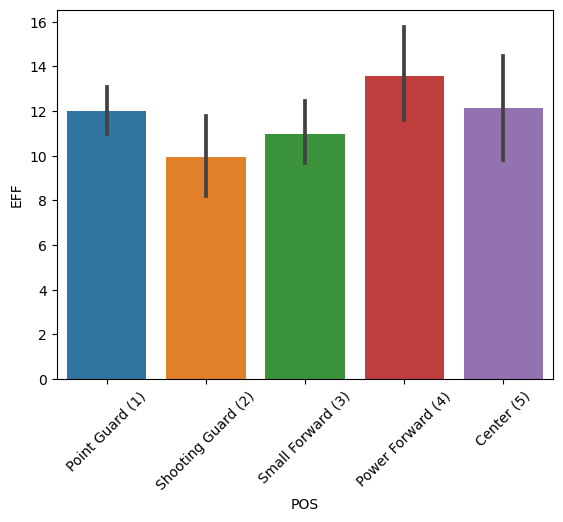

In [48]:
sns.barplot(x="POS", y="EFF", data=final_df, order=['Point Guard (1)','Shooting Guard (2)','Small Forward (3)','Power Forward (4)','Center (5)'])
plt.xticks(rotation=45)